**Object Detection: Model Hub**

In [1]:
%useLatestDescriptors
%use kotlin-dl (0.5.1)

In [2]:
import org.jetbrains.kotlinx.dl.api.summary.printSummary
import org.jetbrains.kotlinx.dl.impl.preprocessing.image.ImageConverter
import org.jetbrains.kotlinx.dl.onnx.inference.ONNXModelHub
import org.jetbrains.kotlinx.dl.onnx.inference.ONNXModels
import org.jetbrains.kotlinx.dl.visualization.swing.createDetectedObjectsPanel
import org.jetbrains.kotlinx.dl.visualization.swing.showFrame
import java.io.File
import javax.imageio.ImageIO

In [3]:
/*val PATH_TO_IMAGE_MAC_OS = "/Users/Alexey.Zinoviev/IdeaProjects/KotlinDL-for-KotlinConf2023/src/main/resources/datasets/detection/image4.jpg"
*/
val PATH_TO_IMAGE = "C:\\Users\\Aleksey.Zinovev\\IdeaProjects\\KotlinDL-for-KotlinConf2023\\src\\main\\resources\\datasets\\detection\\image4.jpg"

**Download the model from the model hub**

In [4]:
val modelHub = ONNXModelHub(cacheDirectory = File("../../../cache/pretrainedModels"))
val detectionModel = ONNXModels.ObjectDetection.EfficientDetD2.pretrainedModel(modelHub)

In [5]:
detectionModel.printSummary()

EfficientDetD2 model summary
Model type: ONNX
___________________________________________________________
Inputs         Type                                        
image_arrays:0 Tensor {dtype=UINT8, shape [-1, -1, -1, -1]}
___________________________________________________________
Outputs        Type                                        
detections:0   Tensor {dtype=FLOAT, shape [1, 100, 7]}     
___________________________________________________________


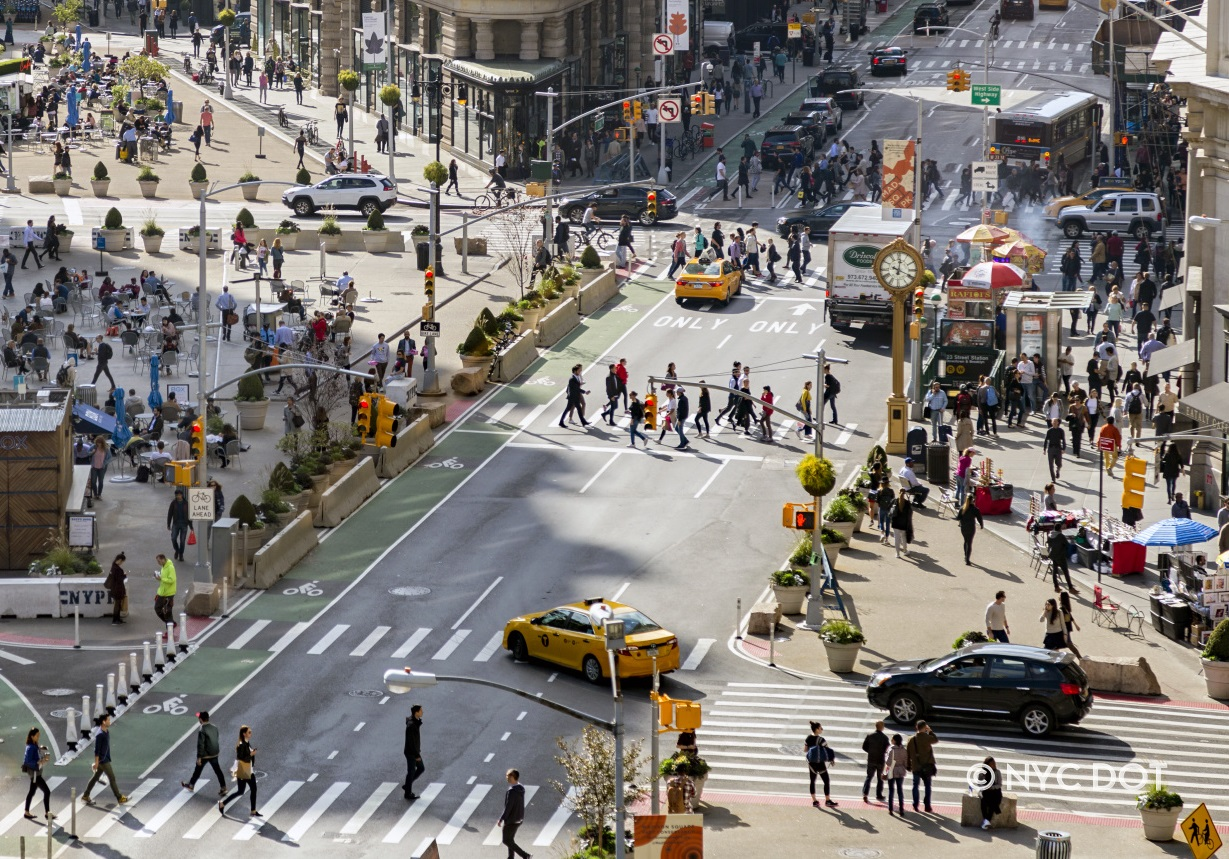

In [6]:
val image = ImageIO.read(File(PATH_TO_IMAGE))

DISPLAY(image)

**Detect 20 different objects: cars, persons, bicycles**

In [7]:
val detectedObjects = detectionModel.detectObjects(image, topK = 20)
detectionModel.close()

**What objects were found?**

In [8]:
detectedObjects.forEach {
    println("Found ${it.label} with probability ${it.probability}")
}

Found car with probability 0.84134936
Found car with probability 0.8090773
Found person with probability 0.78724587
Found person with probability 0.7839452
Found car with probability 0.7737446
Found car with probability 0.7396074
Found clock with probability 0.7365922
Found potted plant with probability 0.65594393
Found person with probability 0.65134436
Found potted plant with probability 0.6460431
Found potted plant with probability 0.62004983
Found person with probability 0.6180429
Found potted plant with probability 0.6163829
Found person with probability 0.6087396
Found umbrella with probability 0.59664387
Found potted plant with probability 0.58650875
Found person with probability 0.56707025
Found person with probability 0.56703913
Found person with probability 0.5637789
Found bus with probability 0.56203365


**Let's draw the rectangles**

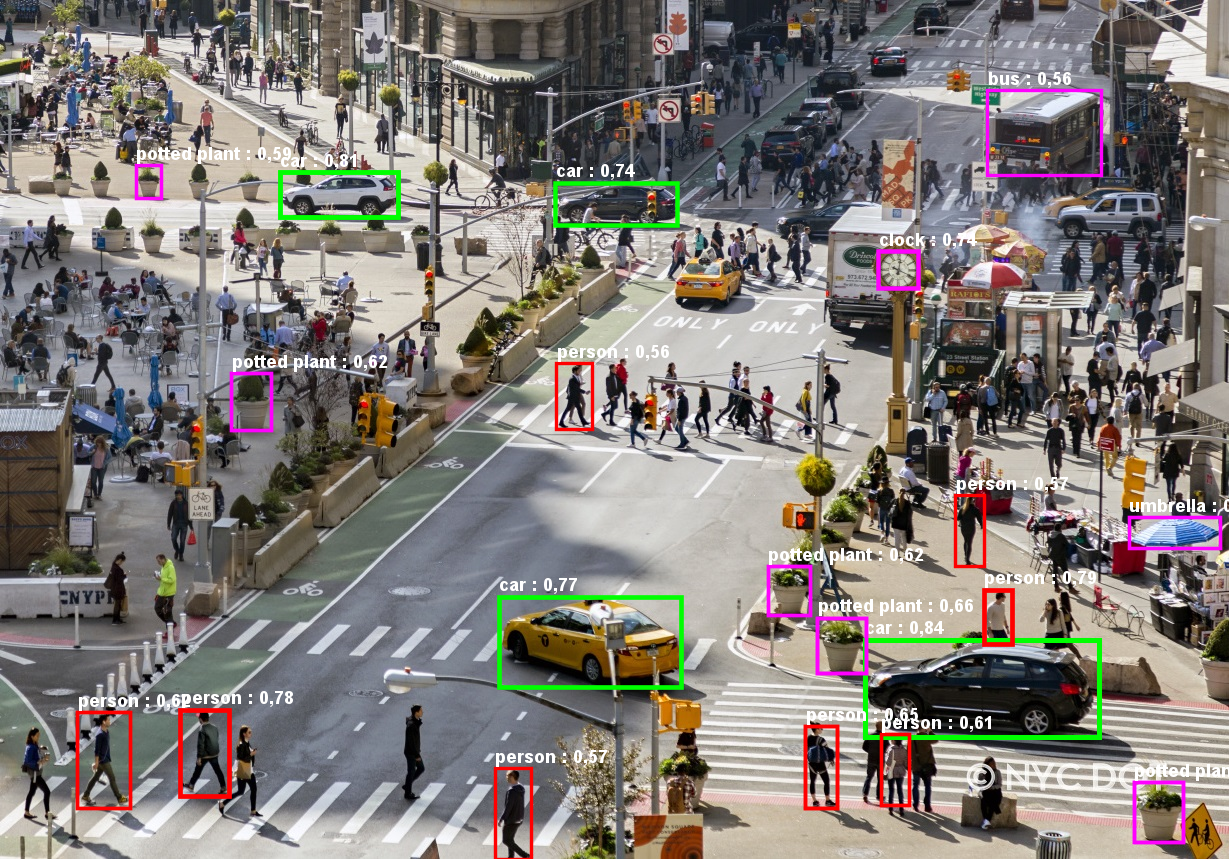

In [9]:
import second.drawRectanglesForDetectedObjects

val streetImageWithRectangles = drawRectanglesForDetectedObjects(image, detectedObjects)
DISPLAY(streetImageWithRectangles)